In [2]:
import scipy.io as sio
from scipy.io import readsav

import numpy as np
import math as m

import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import interp1d
import mpyfit

import os
from os import listdir

min: 26.700000000000003, max: 106.30000000000001


Text(0.5, 0, 'km/s')

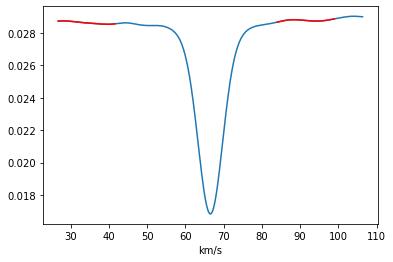

In [3]:
hdul_open_test = fits.open('HD34411/CCFs 34411/34411_191008.1168_ccf.fits', memmap=False)
V_grid = hdul_open_test[1].data['V_grid']
print("min: "+str(np.min(V_grid*1e-5))+", max: "+str(np.max(V_grid*1e-5)))
ccf_test = hdul_open_test[1].data['ccf']

plt.plot(V_grid*1e-5, ccf_test)
plt.plot(V_grid[0:150]*1e-5, ccf_test[0:150], color='r')
plt.plot(V_grid[573:723]*1e-5, ccf_test[573:723], color='r')
plt.xlabel("km/s")

In [4]:
plt.plot(txt_file["CBC RV [m/s]"], label="CBC")
plt.plot(txt_file["CCF RV [m/s]"]-np.mean(txt_file["CCF RV [m/s]"]), label="CCF")
plt.legend()
txt_file

NameError: name 'txt_file' is not defined

In [18]:
len(txt_file["CCF RV [m/s]"])

114

In [19]:
ccf_file_list

ccf_file_list[0].split('_ccf.')[0]

'26965_191101.1119'

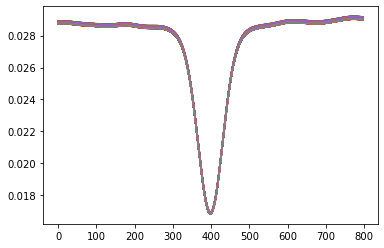

In [5]:
ccf_file_list = os.listdir('HD34411/CCFs 34411/')
txt_file = pd.read_csv('HD34411/34411_activity.csv')

ccf_list = []
V_grid_list = []
file_names_list1 = []
file_names_list2 = []

for i in np.arange(0, len(ccf_file_list)):
    hdul_open_test = fits.open('HD34411/CCFs 34411/'+ccf_file_list[i], memmap=False)
    ccf_test = hdul_open_test[1].data['ccf']
    ccf_list.append(ccf_test)
    V_grid = hdul_open_test[1].data['V_grid']*1e-5 #km/s
    V_grid_list.append(V_grid)
    file_name1 = ccf_file_list[i].split('_ccf.')[0]
    file_names_list1.append(file_name1)
    
    file_name2 = txt_file["File"][i].split('.fi')[0]
    file_names_list2.append(file_name2)

    
s_pd_ccfs = pd.DataFrame(list(zip(file_names_list1, ccf_list, V_grid_list)), 
               columns =['filenames', 'ccf', 'wls'])
s_pd_ccfs_sorted = s_pd_ccfs.sort_values(by=['filenames'])  



s_pd_rv_info = pd.DataFrame(list(zip(file_names_list2, txt_file["CCF RV [m/s]"],
                                     txt_file["CCF RV Err. [m/s]"], txt_file["Time [MJD]"], txt_file["CCF FWHM [m/s]"])), 
               columns =['filenames', 'RV', "RV_e", "BJD", "fwhm"])
s_pd_rv_info_sorted = s_pd_rv_info.sort_values(by=['filenames']) 

combined_df = pd.DataFrame(list(zip(s_pd_ccfs_sorted['filenames'],
                                    s_pd_rv_info_sorted["filenames"], 
                                    s_pd_rv_info_sorted["BJD"],
                                    s_pd_ccfs_sorted['ccf'],
                                    s_pd_ccfs_sorted['wls'],
                                    s_pd_rv_info_sorted["RV"],
                                    s_pd_rv_info_sorted["RV_e"],
                                    s_pd_rv_info_sorted["fwhm"])), 
               columns =['filenames_ccf','filenames2',"bjd", 'ccf','wls','vrad', "svrad", "fwhm"])

for i in ccf_list:
    plt.plot(i)

In [6]:
# checks whether all wavelength solutions (V_grids) are the same. Print nothing == same
for i in combined_df['wls']:
    if np.array_equal(i,combined_df['wls'][0]) !=True:
        print(i)

In [7]:
# double-check that all the files are matched correctly by row. Should print nothing if they match
for i in np.arange(0, len(combined_df)):
    if combined_df['filenames_ccf'][i] != combined_df['filenames2'][i]:
        print(str(combined_df['filenames_ccf'][i])+", "+str(combined_df['filenames2'][i]))

Text(0, 0.5, 'RV (m/s)')

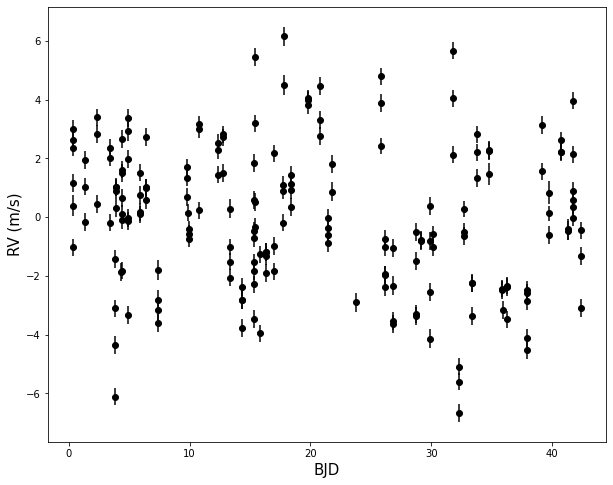

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))

x = combined_df["bjd"]
y = combined_df["vrad"]-np.mean(combined_df["vrad"])
yerr = combined_df["svrad"]

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
ax.errorbar(x%42.38, y, yerr = yerr, fmt = 'o', color='k')
ax.set_xlabel("BJD", size=15)
ax.set_ylabel("RV (m/s)",size=15)

In [9]:
x = -ccf_data - np.min(-ccf_data)
maxval = np.max(x)
ind = np.argmax(x)
print("max: "+str(maxval)+" at index: "+str(ind))

half1 = x[0:ind]
half2 = x[ind:]

h1 = np.abs(half1-(maxval/2.))
h2 = np.abs(half2-(maxval/2.))

min1 = np.min(h1)
ind1 = np.where(h1 == min1)
print("half-max1: "+str(min1)+" at index: "+str(ind1))

min2 = np.min(h2)
ind2 = np.where(h2==min2)

fwhm = ind2[0] +ind - ind1[0]
print(x_axis[fwhm[0]]-x_axis[0])

fig, ax = plt.subplots(1,1, figsize=(8, 5))
plt.plot(x_axis, x)
plt.axvline(x=x_axis[ind], label="max", color="b")
plt.hlines(y=maxval, xmin= np.min(x_axis), xmax=np.max(x_axis), label="max", color="b")
plt.axvline(x_axis[ind1], label="half max 1", color="r")
plt.axvline(x_axis[ind2+ind], label="half max 2", color="r")
plt.hlines(y=maxval/2, xmin= np.min(x_axis), xmax=np.max(x_axis), label="half max", color="r")
#plt.plot([np.min(x_axis), np.max(x_axis)], [maxval, maxval])
plt.legend()
#plt.plot([np.min(x_axis), np.max(x_axis)], [maxval/2., maxval/2.])
#plt.plot(h1)
print(fwhm)
print(ind1[0])
print(ind2)


NameError: name 'ccf_data' is not defined

In [10]:
# A simple fwhm finder 
# flip over ccf, find max, find half max locations, distance between those two locations, divide
def fwhm_sigma(ccf, axis):
    x = -ccf - np.min(-ccf)
    maxval = np.max(x)
    ind = np.argmax(x)
    #print("max: "+str(maxval)+" at index: "+str(ind))

    half1 = x[0:ind]
    half2 = x[ind:]

    h1 = np.abs(half1-(maxval/2.))
    h2 = np.abs(half2-(maxval/2.))

    min1 = np.min(h1)
    ind1 = np.where(h1 == min1)
    #print("half-max1: "+str(min1)+" at index: "+str(ind1))

    min2 = np.min(h2)
    ind2 = np.where(h2==min2)

    fwhm = ind2[0] +ind - ind1[0]
    
    #return fwhm, sigma
    return axis[fwhm[0]]-axis[0], (axis[fwhm[0]]-axis[0])/2.335

In [11]:
fwhm_sigma(ccf_data, x_axis)[1]

NameError: name 'ccf_data' is not defined

In [12]:
# define empty lists

num_ccfs = len(combined_df['wls'])
mpy_coeff_list = []
bjd_list = []
x_diff_list = []
x_axis_ref_shift_list = []
x_axis_zero_shift_list = []
x_axis_mean_shift_list = []
og_ccf_list = []
ref_shifted_CCF_data_list = []
mean_shifted_CCF_data_list = []
mu_og_list = []
mu_ref_list = []
mu_zero_list = []
sigma_og_list = []
CCF_normalized_list = []

# Finds the local minima using a Gaussian fit
# Define the actual function where     A = p[0], mu = p[1], sigma = p[2], c = p[3]
def gauss(x, p):
    return -p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2)) + p[3]

# A simple minimization function:
def least(p, args):
    x, y = args
    return gauss(x, p) - y

for i in range(0, num_ccfs):#(0, num_ccfs):
    bjd = combined_df["bjd"][i]
    bjd_list.append(bjd)
    
    # extracts the ccf data and rv
    ccf_data = combined_df["ccf"][i]
    og_ccf_list.append(ccf_data)
    rv = combined_df["vrad"][i]
    print("rv: "+str((rv-np.mean(combined_df["vrad"]))*0.001))
    fwhm = combined_df["fwhm"][i]
    
    parinfo = [{'fixed': False, 'step': 1e-4*np.max(ccf_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(ccf_data)}]
    
    # original (og) fit before any shifting
    x_axis = combined_df["wls"][i]
    amp_og_guess = np.max(ccf_data)-np.min(ccf_data)
    offset_og_guess = np.max(ccf_data)
    index_og = np.argmin(ccf_data)
    sigma_og = fwhm_sigma(ccf_data, x_axis)[1]
    sigma_og_list.append(sigma_og)
    
    # flip over ccf, find max, find half max locations, distance between those two locations, divide
    p_og_guess = [amp_og_guess, x_axis[index_og], sigma_og, offset_og_guess]
    pfit_og, p_results_og = mpyfit.fit(least, p_og_guess, (x_axis, ccf_data), parinfo)
    mu_og = pfit_og[1]
    print("mu og: "+str(mu_og-np.mean(combined_df["vrad"])*0.001))
    print("__________________")
    mu_og_list.append(mu_og)
    
    # shift to the same reference frame
    x_diff =combined_df["wls"][0][0]-combined_df["wls"][i][0]
    print("x_diff: "+str(x_diff))
    x_diff_list.append(x_diff)
    x_axis_ref_shift = x_axis + x_diff
    x_axis_ref_shift_list.append(x_axis_ref_shift)
    f_ref = interp1d(x_axis, ccf_data, kind='cubic', fill_value='extrapolate')
    ref_shifted_CCF_data = f_ref(x_axis_ref_shift)
    ref_shifted_CCF_data_list.append(ref_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_ref = np.argmin(ref_shifted_CCF_data)
    sigma_ref = fwhm_sigma(ref_shifted_CCF_data, combined_df["wls"][0])[1]
    
    # fit the reference frame shifted rvs
    p_ref_guess = [amp_og_guess, x_axis_ref_shift[index_ref], sigma_ref, offset_og_guess]
    pfit_ref, p_results_ref = mpyfit.fit(least, p_ref_guess, (x_axis_ref_shift, ref_shifted_CCF_data), parinfo)
    mu_ref = pfit_ref[1]
    mu_ref_list.append(mu_ref)
    
    # shift to mean
    shift_to_mean = (np.mean(combined_df["vrad"]) - rv )*0.001
    #print("shift to mean: " +str(shift_to_mean))
    x_axis_mean_shift = x_axis_ref_shift + shift_to_mean
    x_axis_mean_shift_list.append(x_axis_mean_shift)
    f_mean = interp1d(x_axis_mean_shift, ref_shifted_CCF_data, kind='cubic', fill_value='extrapolate')
    mean_shifted_CCF_data = f_mean(x_axis_ref_shift)
    mean_shifted_CCF_data_list.append(mean_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_mean = np.argmin(mean_shifted_CCF_data)
    
    # fit the zero shifted rvs
    p_zero_guess = [amp_og_guess, x_axis_ref_shift[index_mean], sigma_ref, offset_og_guess]
    pfit_zero, p_results_zero = mpyfit.fit(least, p_zero_guess, (x_axis_ref_shift, mean_shifted_CCF_data), parinfo)
    mu_zero = pfit_zero[1]
    #print("zero mu: "+str(mu_zero))
    mu_zero_list.append(mu_zero)
    
    # Normalizes the CCFs
    x_left = mean_shifted_CCF_data[0:150]
    x_right = mean_shifted_CCF_data[573:723]
    x_norm_range = list(x_left) + list(x_right)
    CCF_normalized = mean_shifted_CCF_data*(1/np.mean(x_norm_range))
    CCF_normalized_list.append(CCF_normalized)

    # finds center of mass
    #center_of_mass = np.sum((1-CCF_data)*rv_data)/(np.sum(1-CCF_data))
    #print(center_of_mass)

    #creates columns in CCF.fits files
    #col1 = fits.Column(name='RV data', format='E', array=x_axis_ref_shift)
    #col2 = fits.Column(name='CCF data', format='E', array=CCF_normalized)
    ##col3 = fits.Column(name='CCF data rescaled', format='E', array=CCF_rescaled)
    #cols = fits.ColDefs([col1, col2]) #, col3])

    #tbhdu = fits.BinTableHDU.from_columns(cols)

    #hdu = fits.PrimaryHDU()
    #hdu = fits.PrimaryHDU()
    #hdulist = fits.HDUList([hdu])

    #tbhdu = fits.BinTableHDU.from_columns(cols)
    #hdu_new = fits.ImageHDU()
    #hdr = fits.Header()
    #primary_hdu = fits.PrimaryHDU(header=hdr)
    #hdul = fits.HDUList([primary_hdu, hdu_new])

    #hdul[0].header.set('label', s_pd_clean['vrad'][i], 'RV [km/s]')
    #hdul[0].header.set('s_label', s_pd_clean['svrad'][i], 'RV [km/s]')
    #hdul[0].header.set("BJD", bjd, 'Barycentric JD (from DRS)')
    #hdul[0].header.set('MU_og', mu_og, 'km/s')
    #hdul[0].header.set('mu_ref', mu_ref, 'km/s')
    #hdul[0].header.set('MU_zero', mu_zero, 'km/s')

    #hdul[0].header.set('fwhm', fwhm, 'CCF FWHM from DRS')
    #hdul[0].header.set('contrast', contrast, 'CCF contrast from DRS')
    #hdul[0].header.set('bis', bis_span, 'CCF BIS Span from DRS')
    #hdul[0].header.set('noise', noise, 'noise from DRS')
    #hdul[0].header.set('s_mw', s_mw, 's_mw from DRS')


    #hdul.append(tbhdu)

    #uncomment below if you want to write files
    #hdul.writeto('hd212657/shifted_fits_clean73_Jan4/ccf' + str(i)+'.fits')
    #hdul.close()

# write it all to one file
#creates columns in CCF.fits files
col1 = fits.Column(name='bjd', format='E', array=bjd_list)

# ccf params
col2 = fits.Column(name='og_ccf_list', format='723E', dim='(114)', array=og_ccf_list)
col3 = fits.Column(name='ref_shifted_CCF_data_list',format='723E', dim='(114)', array=ref_shifted_CCF_data_list)
col4 = fits.Column(name='mean_shifted_CCF_data_list', format='723E',  dim='(114)', array=mean_shifted_CCF_data_list)
col5 = fits.Column(name='CCF_normalized_list', format='723E', dim='(114)', array=CCF_normalized_list)
col6 = fits.Column(name='mu_og_list', format='E', array=mu_og_list)
col7 = fits.Column(name='mu_ref_list', format='E', array=mu_ref_list)
col8 = fits.Column(name='mu_zero_list', format='E', array=mu_zero_list)

# rv and textfile params
col9 = fits.Column(name='vrad', format='E', array=combined_df["vrad"])
col10 = fits.Column(name='svrad', format='E', array=combined_df["svrad"])
col11 = fits.Column(name='fwhm', format='E', array=combined_df["fwhm"])

cols1 = fits.ColDefs([col2, col3, col4, col5])

cols2 = fits.ColDefs([col1, col6, col7, col8,
                    col9, col10, col11])

#hdu = fits.PrimaryHDU()
primary_hdu = fits.PrimaryHDU()
t = fits.BinTableHDU.from_columns([col2, col3, col4, col5])
table_hdu2 = fits.BinTableHDU.from_columns([col1, col6, col7, col8,
                    col9, col10, col11])

hdul = fits.HDUList([primary_hdu, t, table_hdu2])
hdul.writeto('HD34411/shifted_fits_clean_Feb16_one_file/shifted_ccfs_combined.fits')
hdul.close()

#tbhdu = fits.BinTableHDU.from_columns(cols1)
#hdu_new = fits.ImageHDU()
#hdr = fits.Header()
#primary_hdu = fits.PrimaryHDU(header=hdr)
#hdul = fits.HDUList([primary_hdu, hdu_new])
#hdul.writeto('hd212657/shifted_fits_clean73_Jan14_one_file/shifted_ccfs.fits')
#hdul.close()
    

rv: 0.0038901010638073786
mu og: -0.0006335357936819719
__________________
x_diff: 0.0
rv: 0.0024241010638215814
mu og: -0.002444438170599028
__________________
x_diff: 0.0
rv: 0.0048051010638155275
mu og: -0.0009085656523382113
__________________
x_diff: 0.0
rv: 0.0002871010638191365
mu og: -0.006051840166577449
__________________
x_diff: 0.0
rv: -0.0006468989361892454
mu og: -0.005943604002339953
__________________
x_diff: 0.0
rv: -0.0004988989361881977
mu og: -0.0058552773025866145
__________________
x_diff: 0.0
rv: 0.0028271010638127336
mu og: -0.002452775807498142
__________________
x_diff: 0.0
rv: 0.0013361010638036532
mu og: -0.002774286875734333
__________________
x_diff: 0.0
rv: 0.0022171010638121517
mu og: -0.0031837382688451044
__________________
x_diff: 0.0
rv: 0.0022571010638203007
mu og: -0.0027252673632602864
__________________
x_diff: 0.0
rv: 0.001473101063806098
mu og: -0.0036110932293240694
__________________
x_diff: 0.0
rv: 0.0022941010638169246
mu og: -0.00326460424

rv: 0.0027181010638159934
mu og: -0.0035445329804275616
__________________
x_diff: 0.0
rv: 0.0015011010638118023
mu og: -0.004245542244802891
__________________
x_diff: 0.0
rv: 0.0028181010638072624
mu og: -0.00291238385635495
__________________
x_diff: 0.0
rv: 0.006163101063808426
mu og: 0.0003978757156346546
__________________
x_diff: 0.0
rv: 0.004496101063807146
mu og: -0.00025447825917979117
__________________
x_diff: 0.0
rv: 0.004057101063823211
mu og: -0.002350246417051949
__________________
x_diff: 0.0
rv: 0.0038201010638149457
mu og: -0.002280401516983943
__________________
x_diff: 0.0
rv: 0.004004101063823327
mu og: -0.0015329343918182303
__________________
x_diff: 0.0
rv: 0.003322101063822629
mu og: -0.002074393009593223
__________________
x_diff: 0.0
rv: 0.00445810106380668
mu og: -0.0006957623293004644
__________________
x_diff: 0.0
rv: 0.0027771010638098234
mu og: -0.0022717710613306963
__________________
x_diff: 0.0
rv: 0.0008751010638079606
mu og: -0.0037649700081345827


ValueError: could not broadcast input array from shape (188,797) into shape (188,723)

In [29]:
# Test to shift to mu og fit (rather than rv measurements straight from EXPRES)

num_ccfs = len(combined_df['wls'])
mpy_coeff_list = []
bjd_list = []
x_diff_list = []
x_axis_ref_shift_list = []
x_axis_zero_shift_list = []
x_axis_mean_shift_list = []
og_ccf_list = []
ref_shifted_CCF_data_list = []
mean_shifted_CCF_data_list = []
mu_og_list = []
mu_ref_list = []
mu_zero_list = []
sigma_og_list = []
CCF_normalized_list = []

# Finds the local minima using a Gaussian fit
# Define the actual function where     A = p[0], mu = p[1], sigma = p[2], c = p[3]
def gauss(x, p):
    return -p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2)) + p[3]

# A simple minimization function:
def least(p, args):
    x, y = args
    return gauss(x, p) - y

for i in range(0, num_ccfs):#(0, num_ccfs):
    bjd = combined_df["bjd"][i]
    bjd_list.append(bjd)
    
    # extracts the ccf data and rv
    ccf_data = combined_df["ccf"][i]
    og_ccf_list.append(ccf_data)
    rv = combined_df["vrad"][i]
    print("rv: "+str((rv-np.mean(combined_df["vrad"]))*0.001))
    fwhm = combined_df["fwhm"][i]
    
    parinfo = [{'fixed': False, 'step': 1e-4*np.max(ccf_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(ccf_data)}]
    
    # original (og) fit before any shifting
    x_axis = combined_df["wls"][i]
    amp_og_guess = np.max(ccf_data)-np.min(ccf_data)
    offset_og_guess = np.max(ccf_data)
    index_og = np.argmin(ccf_data)
    sigma_og = fwhm_sigma(ccf_data, x_axis)[1]
    sigma_og_list.append(sigma_og)
    
    # flip over ccf, find max, find half max locations, distance between those two locations, divide
    p_og_guess = [amp_og_guess, x_axis[index_og], sigma_og, offset_og_guess]
    pfit_og, p_results_og = mpyfit.fit(least, p_og_guess, (x_axis, ccf_data), parinfo)
    mu_og = pfit_og[1]
    print("mu og: "+str(mu_og-np.mean(combined_df["vrad"])*0.001))
    print("__________________")
    mu_og_list.append(mu_og)
    
for i in range(0, num_ccfs):#(0, num_ccfs):
    bjd = combined_df["bjd"][i]
    bjd_list.append(bjd)
    
    # extracts the ccf data and rv
    ccf_data = combined_df["ccf"][i]
    og_ccf_list.append(ccf_data)
    rv = combined_df["vrad"][i]
    print("rv: "+str((rv-np.mean(combined_df["vrad"]))*0.001))
    fwhm = combined_df["fwhm"][i]
    
    parinfo = [{'fixed': False, 'step': 1e-4*np.max(ccf_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(ccf_data)}]
    
    # original (og) fit before any shifting
    x_axis = combined_df["wls"][i]
    amp_og_guess = np.max(ccf_data)-np.min(ccf_data)
    offset_og_guess = np.max(ccf_data)
    index_og = np.argmin(ccf_data)
    sigma_og = fwhm_sigma(ccf_data, x_axis)[1]
    sigma_og_list.append(sigma_og)
    
    # flip over ccf, find max, find half max locations, distance between those two locations, divide
    p_og_guess = [amp_og_guess, x_axis[index_og], sigma_og, offset_og_guess]
    pfit_og, p_results_og = mpyfit.fit(least, p_og_guess, (x_axis, ccf_data), parinfo)
    mu_og = pfit_og[1]
    print("mu og: "+str(mu_og-np.mean(combined_df["vrad"])*0.001))
    print("__________________")
    #mu_og_list.append(mu_og)
    
    # shift to the same reference frame
    x_diff =combined_df["wls"][0][0]-combined_df["wls"][i][0]
    print("x_diff: "+str(x_diff))
    x_diff_list.append(x_diff)
    x_axis_ref_shift = x_axis + x_diff
    x_axis_ref_shift_list.append(x_axis_ref_shift)
    f_ref = interp1d(x_axis, ccf_data, kind='cubic', fill_value='extrapolate')
    ref_shifted_CCF_data = f_ref(x_axis_ref_shift)
    ref_shifted_CCF_data_list.append(ref_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_ref = np.argmin(ref_shifted_CCF_data)
    sigma_ref = fwhm_sigma(ref_shifted_CCF_data, combined_df["wls"][0])[1]
    
    # fit the reference frame shifted rvs
    p_ref_guess = [amp_og_guess, x_axis_ref_shift[index_ref], sigma_ref, offset_og_guess]
    pfit_ref, p_results_ref = mpyfit.fit(least, p_ref_guess, (x_axis_ref_shift, ref_shifted_CCF_data), parinfo)
    mu_ref = pfit_ref[1]
    mu_ref_list.append(mu_ref)
    
    # shift to mean
    shift_to_mean = (np.mean(mu_og_list) - mu_og )#*0.001
    #print("shift to mean: " +str(shift_to_mean))
    x_axis_mean_shift = x_axis_ref_shift + shift_to_mean
    x_axis_mean_shift_list.append(x_axis_mean_shift)
    f_mean = interp1d(x_axis_mean_shift, ref_shifted_CCF_data, kind='cubic', fill_value='extrapolate')
    mean_shifted_CCF_data = f_mean(x_axis_ref_shift)
    mean_shifted_CCF_data_list.append(mean_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_mean = np.argmin(mean_shifted_CCF_data)
    
    # fit the zero shifted rvs
    p_zero_guess = [amp_og_guess, x_axis_ref_shift[index_mean], sigma_ref, offset_og_guess]
    pfit_zero, p_results_zero = mpyfit.fit(least, p_zero_guess, (x_axis_ref_shift, mean_shifted_CCF_data), parinfo)
    mu_zero = pfit_zero[1]
    #print("zero mu: "+str(mu_zero))
    mu_zero_list.append(mu_zero)
    
    # Normalizes the CCFs
    x_left = mean_shifted_CCF_data[0:150]
    x_right = mean_shifted_CCF_data[573:723]
    x_norm_range = list(x_left) + list(x_right)
    CCF_normalized = mean_shifted_CCF_data*(1/np.mean(x_norm_range))
    CCF_normalized_list.append(CCF_normalized)

    # finds center of mass
    #center_of_mass = np.sum((1-CCF_data)*rv_data)/(np.sum(1-CCF_data))
    #print(center_of_mass)

    #creates columns in CCF.fits files
    #col1 = fits.Column(name='RV data', format='E', array=x_axis_ref_shift)
    #col2 = fits.Column(name='CCF data', format='E', array=CCF_normalized)
    ##col3 = fits.Column(name='CCF data rescaled', format='E', array=CCF_rescaled)
    #cols = fits.ColDefs([col1, col2]) #, col3])

    #tbhdu = fits.BinTableHDU.from_columns(cols)

    #hdu = fits.PrimaryHDU()
    #hdu = fits.PrimaryHDU()
    #hdulist = fits.HDUList([hdu])

    #tbhdu = fits.BinTableHDU.from_columns(cols)
    #hdu_new = fits.ImageHDU()
    #hdr = fits.Header()
    #primary_hdu = fits.PrimaryHDU(header=hdr)
    #hdul = fits.HDUList([primary_hdu, hdu_new])

    #hdul[0].header.set('label', s_pd_clean['vrad'][i], 'RV [km/s]')
    #hdul[0].header.set('s_label', s_pd_clean['svrad'][i], 'RV [km/s]')
    #hdul[0].header.set("BJD", bjd, 'Barycentric JD (from DRS)')
    #hdul[0].header.set('MU_og', mu_og, 'km/s')
    #hdul[0].header.set('mu_ref', mu_ref, 'km/s')
    #hdul[0].header.set('MU_zero', mu_zero, 'km/s')

    #hdul[0].header.set('fwhm', fwhm, 'CCF FWHM from DRS')
    #hdul[0].header.set('contrast', contrast, 'CCF contrast from DRS')
    #hdul[0].header.set('bis', bis_span, 'CCF BIS Span from DRS')
    #hdul[0].header.set('noise', noise, 'noise from DRS')
    #hdul[0].header.set('s_mw', s_mw, 's_mw from DRS')


    #hdul.append(tbhdu)

    #uncomment below if you want to write files
    #hdul.writeto('hd212657/shifted_fits_clean73_Jan4/ccf' + str(i)+'.fits')
    #hdul.close()

# write it all to one file
#creates columns in CCF.fits files
col1 = fits.Column(name='bjd', format='E', array=bjd_list)

# ccf params
col2 = fits.Column(name='og_ccf_list', format='723E', dim='(114)', array=og_ccf_list)
col3 = fits.Column(name='ref_shifted_CCF_data_list',format='723E', dim='(114)', array=ref_shifted_CCF_data_list)
col4 = fits.Column(name='mean_shifted_CCF_data_list', format='723E',  dim='(114)', array=mean_shifted_CCF_data_list)
col5 = fits.Column(name='CCF_normalized_list', format='723E', dim='(114)', array=CCF_normalized_list)
col6 = fits.Column(name='mu_og_list', format='E', array=mu_og_list)
col7 = fits.Column(name='mu_ref_list', format='E', array=mu_ref_list)
col8 = fits.Column(name='mu_zero_list', format='E', array=mu_zero_list)

# rv and textfile params
col9 = fits.Column(name='vrad', format='E', array=combined_df["vrad"])
col10 = fits.Column(name='svrad', format='E', array=combined_df["svrad"])
col11 = fits.Column(name='fwhm', format='E', array=combined_df["fwhm"])

cols1 = fits.ColDefs([col2, col3, col4, col5])

cols2 = fits.ColDefs([col1, col6, col7, col8,
                    col9, col10, col11])

#hdu = fits.PrimaryHDU()
primary_hdu = fits.PrimaryHDU()
t = fits.BinTableHDU.from_columns([col2, col3, col4, col5])
table_hdu2 = fits.BinTableHDU.from_columns([col1, col6, col7, col8,
                    col9, col10, col11])

hdul = fits.HDUList([primary_hdu, t, table_hdu2])
hdul.writeto('HD34411/shifted_fits_clean_Feb16_one_file/shifted_ccfs_combined.fits')
hdul.close()

#tbhdu = fits.BinTableHDU.from_columns(cols1)
#hdu_new = fits.ImageHDU()
#hdr = fits.Header()
#primary_hdu = fits.PrimaryHDU(header=hdr)
#hdul = fits.HDUList([primary_hdu, hdu_new])
#hdul.writeto('hd212657/shifted_fits_clean73_Jan14_one_file/shifted_ccfs.fits')
#hdul.close()
    

rv: 0.0038901010638073786
mu og: -0.0006335357936819719
__________________
rv: 0.0024241010638215814
mu og: -0.002444438170599028
__________________
rv: 0.0048051010638155275
mu og: -0.0009085656523382113
__________________
rv: 0.0002871010638191365
mu og: -0.006051840166577449
__________________
rv: -0.0006468989361892454
mu og: -0.005943604002339953
__________________
rv: -0.0004988989361881977
mu og: -0.0058552773025866145
__________________
rv: 0.0028271010638127336
mu og: -0.002452775807498142
__________________
rv: 0.0013361010638036532
mu og: -0.002774286875734333
__________________
rv: 0.0022171010638121517
mu og: -0.0031837382688451044
__________________
rv: 0.0022571010638203007
mu og: -0.0027252673632602864
__________________
rv: 0.001473101063806098
mu og: -0.0036110932293240694
__________________
rv: 0.0022941010638169246
mu og: -0.0032646042468229552
__________________
rv: 0.0008401010638190201
mu og: -0.003797035219562872
__________________
rv: -0.0005978989361901767
mu 

mu og: -0.005961169131751376
__________________
rv: -0.00667589893618424
mu og: -0.008465298146248301
__________________
rv: -0.005599898936183309
mu og: -0.007540564343017309
__________________
rv: -0.0022498989361920394
mu og: -0.004635052167344611
__________________
rv: -0.002235898936181911
mu og: -0.004517593760141381
__________________
rv: -0.0033648989361827262
mu og: -0.00522360723154236
__________________
rv: -0.003476898936190992
mu og: -0.0055587850956300144
__________________
rv: -0.0023718989361805145
mu og: -0.0035347875298299414
__________________
rv: -0.0023338989361946006
mu og: -0.004501396670363533
__________________
rv: -0.004355898936177255
mu og: -0.007045886990994177
__________________
rv: -0.0014268989361880813
mu og: -0.003379730300224537
__________________
rv: -0.003105898936177255
mu og: -0.003714011581593013
__________________
rv: -0.00610889893618878
mu og: -0.00872988882569814
__________________
rv: -0.0012668989361845889
mu og: -0.005897913507297403
_____

rv: -0.004510898936176091
mu og: -0.006311006269299924
__________________
x_diff: 0.0
rv: -0.0024878989361895947
mu og: -0.003911082057371118
__________________
x_diff: 0.0
rv: 0.001013101063814247
mu og: -0.00407216267262811
__________________
x_diff: 0.0
rv: 0.0027391010638239096
mu og: -0.001260803657572751
__________________
x_diff: 0.0
rv: 0.000991101063817041
mu og: -0.0037615237444583727
__________________
x_diff: 0.0
rv: 0.0005881010638113367
mu og: -0.0034224533203683905
__________________
x_diff: 0.0
rv: -0.0018478989361901768
mu og: -0.007779127965051202
__________________
x_diff: 0.0
rv: 0.0005971010638168082
mu og: -0.004704398737317206
__________________
x_diff: 0.0
rv: 0.001855101063818438
mu og: -0.002834974918783928
__________________
x_diff: 0.0
rv: -0.00046089893618773205
mu og: -0.0059716549840942434
__________________
x_diff: 0.0
rv: 0.0005151010638073786
mu og: -0.004749037275402657
__________________
x_diff: 0.0
rv: 0.0011411010638112202
mu og: -0.003450195528060

ValueError: could not broadcast input array from shape (376,797) into shape (376,723)

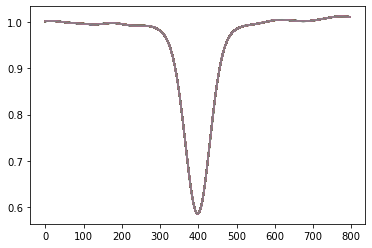

In [19]:
for i in range(0, len(CCF_normalized_list)):
    plt.plot(CCF_normalized_list[i])

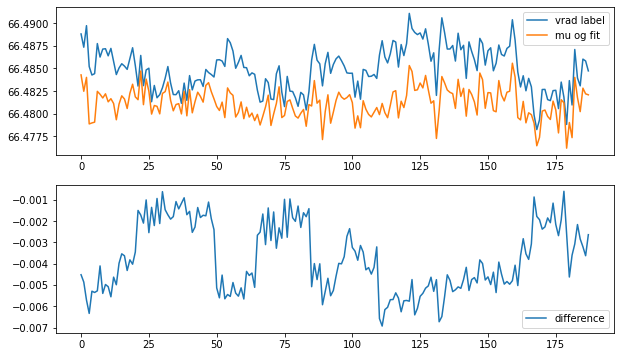

In [20]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))
ax[0].plot(combined_df["vrad"]*0.001, label="vrad label")
ax[0].plot(mu_og_list, label="mu og fit")
ax[1].plot(mu_og_list-combined_df["vrad"]*0.001,  label="difference")
ax[0].legend(loc="upper right")
ax[1].legend()

In [21]:
np.mean(combined_df["vrad"]*0.001)

66.48491489893618

In [22]:
np.mean(mu_og_list-combined_df["vrad"]*0.001)*1000

-3.7599964282766476

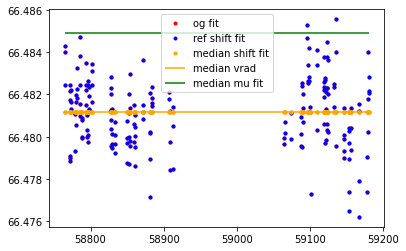

In [23]:
#plt.plot(s_pd_clean["vrad"]*0.001, label = "rvs")
plt.plot(combined_df["bjd"], mu_og_list, ".", label = "og fit", color= 'r')
plt.plot(combined_df["bjd"], mu_ref_list,".", label = "ref shift fit", color="b")
plt.plot(combined_df["bjd"], mu_zero_list, ".",label = "median shift fit", color="orange")
plt.hlines(y=np.mean(mu_og_list), xmin= np.min(combined_df["bjd"]), xmax=np.max(combined_df["bjd"]), label="median vrad", color="orange")
plt.hlines(y=np.mean(combined_df["vrad"]*0.001), xmin= np.min(combined_df["bjd"]), xmax=np.max(combined_df["bjd"]), label="median mu fit", color="green")
#plt.xlim(0, 38)
#plt.ylim(-18, -17)
plt.legend()

In [27]:
# open fits file to check contents
hdul_open = fits.open('HD34411/shifted_fits_clean_Feb16_one_file/shifted_ccfs_combined.fits', memmap=False)
open_ccf_norm_list = hdul_open[1].data['CCF_normalized_list']
open_vrad_list = hdul_open[2].data['vrad']

min_rv = np.min(open_vrad_list)
max_rv = np.max(open_vrad_list)
cscale_residuals = (np.array(open_vrad_list -min_rv)/ (max_rv-min_rv))
print(np.min(cscale_residuals), np.max(cscale_residuals))

plt.hist(cscale_residuals)

len(open_vrad_list)

FileNotFoundError: [Errno 2] No such file or directory: 'HD34411/shifted_fits_clean_Feb16_one_file/shifted_ccfs_combined.fits'

0.0 1.0


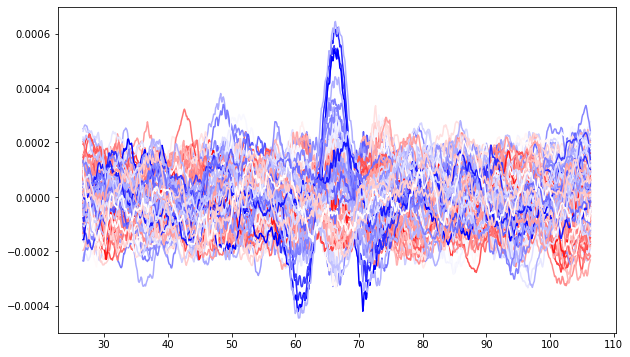

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

min_rv = np.min(combined_df["vrad"])
max_rv = np.max(combined_df["vrad"])
cscale_residuals = (np.array(combined_df["vrad"] -min_rv)/ (max_rv-min_rv))
print(np.min(cscale_residuals), np.max(cscale_residuals))

# gather x-axis
hdul_open_grid = fits.open('HD34411/CCFs 34411/34411_191008.1168_ccf.fits', memmap=False)
V_grid_x = hdul_open_grid[1].data['V_grid']

col = plt.cm.jet([0.25,0.75])
n = len(CCF_normalized_list)#open_ccf_norm_list)
colors = plt.cm.bwr(cscale_residuals)

median_ccf = np.median(CCF_normalized_list,axis=0)#open_ccf_norm_list, axis=0)
num = 0
for i in CCF_normalized_list:#open_ccf_norm_list:
    plt.plot(V_grid_x*1e-5, i-median_ccf, color = colors[num])
    num += 1

In [234]:
# Jan 28 - y_preds

uncertainty_true = 1.876
y_erros = [0.265, 0.256, 0.26, 0.27, 0.265, 0.262, 0.282, 0.294, 0.261, 0.264, 0.238, 0.24, 0.234, 0.24, 0.239, 0.26, 0.297, 0.303, 0.297, 0.241, 0.265, 0.249, 0.248, 0.25, 0.25, 0.249, 0.249, 0.256, 0.256, 0.256, 0.256, 0.258, 0.259, 0.259, 0.26, 0.254, 0.255, 0.256, 0.256, 0.239, 0.24, 0.241, 0.241, 0.254, 0.253, 0.252, 0.252, 0.257, 0.255, 0.254, 0.255, 0.247, 0.248, 0.246, 0.246, 0.248, 0.248, 0.249, 0.25, 0.254, 0.252, 0.275, 0.241, 0.241, 0.263, 0.266, 0.265, 0.251, 0.25, 0.25, 0.25, 0.252, 0.25, 0.25, 0.249, 0.25, 0.244, 0.244, 0.245, 0.244, 0.244, 0.245, 0.26, 0.259, 0.261, 0.254, 0.253, 0.252, 0.251, 0.253, 0.252, 0.258, 0.256, 0.255, 0.255, 0.248, 0.249, 0.25, 0.259, 0.32, 0.264, 0.263, 0.264, 0.371, 0.246, 0.247, 0.248, 0.242, 0.246, 0.246, 0.249, 0.245, 0.243, 0.245]
y_bjds = [58715.48828125, 58719.46875, 58719.47265625, 58720.49609375, 58764.3984375, 58764.40234375, 58764.40234375, 58772.44921875, 58772.44921875, 58772.453125, 58780.3515625, 58780.3515625, 58780.35546875, 58781.43359375, 58781.4375, 58781.44140625, 58788.44140625, 58788.44140625, 58788.4453125, 58794.3984375, 58794.40234375, 58794.40234375, 58794.40625, 58795.39453125, 58795.39453125, 58795.3984375, 58795.40234375, 58796.33984375, 58796.33984375, 58796.34375, 58796.34375, 58797.38671875, 58797.38671875, 58797.38671875, 58797.390625, 58798.21484375, 58798.21875, 58798.22265625, 58798.2265625, 58833.328125, 58833.3359375, 58833.33984375, 58833.34375, 58850.19921875, 58850.203125, 58850.203125, 58850.20703125, 58852.12890625, 58852.1328125, 58852.1328125, 58852.13671875, 58872.171875, 58872.171875, 58872.17578125, 58872.17578125, 58884.15625, 58884.16015625, 58884.1640625, 58884.171875, 59088.49609375, 59088.5, 59090.4921875, 59097.5, 59097.5, 59099.4765625, 59099.48046875, 59099.48046875, 59109.46875, 59109.47265625, 59109.47265625, 59118.44140625, 59118.44140625, 59118.4453125, 59119.4375, 59119.4375, 59119.44140625, 59120.48046875, 59120.484375, 59120.484375, 59121.390625, 59121.39453125, 59121.3984375, 59122.4296875, 59122.4296875, 59122.43359375, 59123.49609375, 59123.49609375, 59123.49609375, 59132.48046875, 59132.48046875, 59132.484375, 59146.28515625, 59146.28515625, 59146.296875, 59146.296875, 59152.37890625, 59152.37890625, 59152.3828125, 59153.40625, 59153.40625, 59153.453125, 59153.453125, 59153.453125, 59156.3671875, 59156.41015625, 59156.4140625, 59156.4140625, 59168.296875, 59179.33203125, 59179.3359375, 59179.3359375, 59180.2265625, 59180.23046875, 59180.234375]
y_preds = [0.42869114729453983, -1.0536185034362626, 1.1551501629404235, -1.472605423366598, 0.5877209477522185, 2.0307298656381936, -0.49856759399661044, -2.6163874652819334, -2.9222897099324676, -0.7044713211849956, -1.7445102472119367, -3.3687689232762437, -2.623750954515531, -2.8869947018635855, -2.2919051417245626, -3.621105518696496, 0.4091466179611025, 0.6722412292680018, -2.5253031330443365, 2.5068914624148357, 1.6613025335894305, 4.05221554408925, 1.4945542524837336, 0.2929255594845602, 4.5265880376532674, 3.1409353756794713, 2.900647773005493, 2.740077269425567, 4.257510355568794, 1.9218364754584651, 1.5593678045876196, 2.7416890557466376, 4.4730490461087085, 2.6624633552173824, 2.2989718522000846, 3.4001746016780316, 2.5042692340227655, 1.1246430992252745, 1.0333445490465105, 0.4513908209042259, 2.2077744258306593, 1.8625317294771055, 1.6993646543306915, -2.685878919399263, -2.3244801727484687, -2.071691710205701, -0.8518640013648923, -0.5741331238841076, 0.36896028575825257, -0.7474668976353629, -0.05936654783030576, -0.12336201088758703, 0.31618541882110807, 1.1194948868490868, 0.7386372648389794, 2.046836896234171, 3.0222613805069054, 1.7792980281678525, 2.5260395226446795, 1.4025502903866975, -0.49095005824010385, 1.0515011813988995, 3.29729917703592, 2.683339698644868, 0.07525404633778399, 1.2568063256469395, 3.460797394393357, 0.15744994806659274, 0.7839988791927468, -0.37363440502337447, -0.7826244294068905, -1.4137004840912137, -0.8426852566701382, -0.8950094360686698, -1.965223398136807, -2.3508914281671145, -2.897752395198953, -3.3894910080126692, -3.473504766899345, -2.375297271847418, -1.1817514889977165, -0.9805800664657589, -2.802595255256862, -2.628175451128066, -0.978901058681813, -1.1445188776013604, -1.3467246436719373, -1.896673941720534, 4.968799378664613, 3.488310946253156, 2.8815115102393714, 2.1543941767312447, 1.0773896613727423, 3.8263925213795513, 1.4157976556037815, -4.914573098583732, -2.821263054599072, -4.4350898414921325, -2.808229622240072, -3.1674059668437957, -4.356137215007266, -4.016658689249881, -4.15970477378741, -5.800127141029556, -4.3364915641017605, -3.8728898318962894, -4.6844621928397565, -0.21772691190674187, 1.3517401069045258, 2.883239974436399, 3.5812301236864323, 0.6777306094843532, 1.9493722038926513, 2.481545723492121]

In [240]:
np.max(y_preds)

4.968799378664613

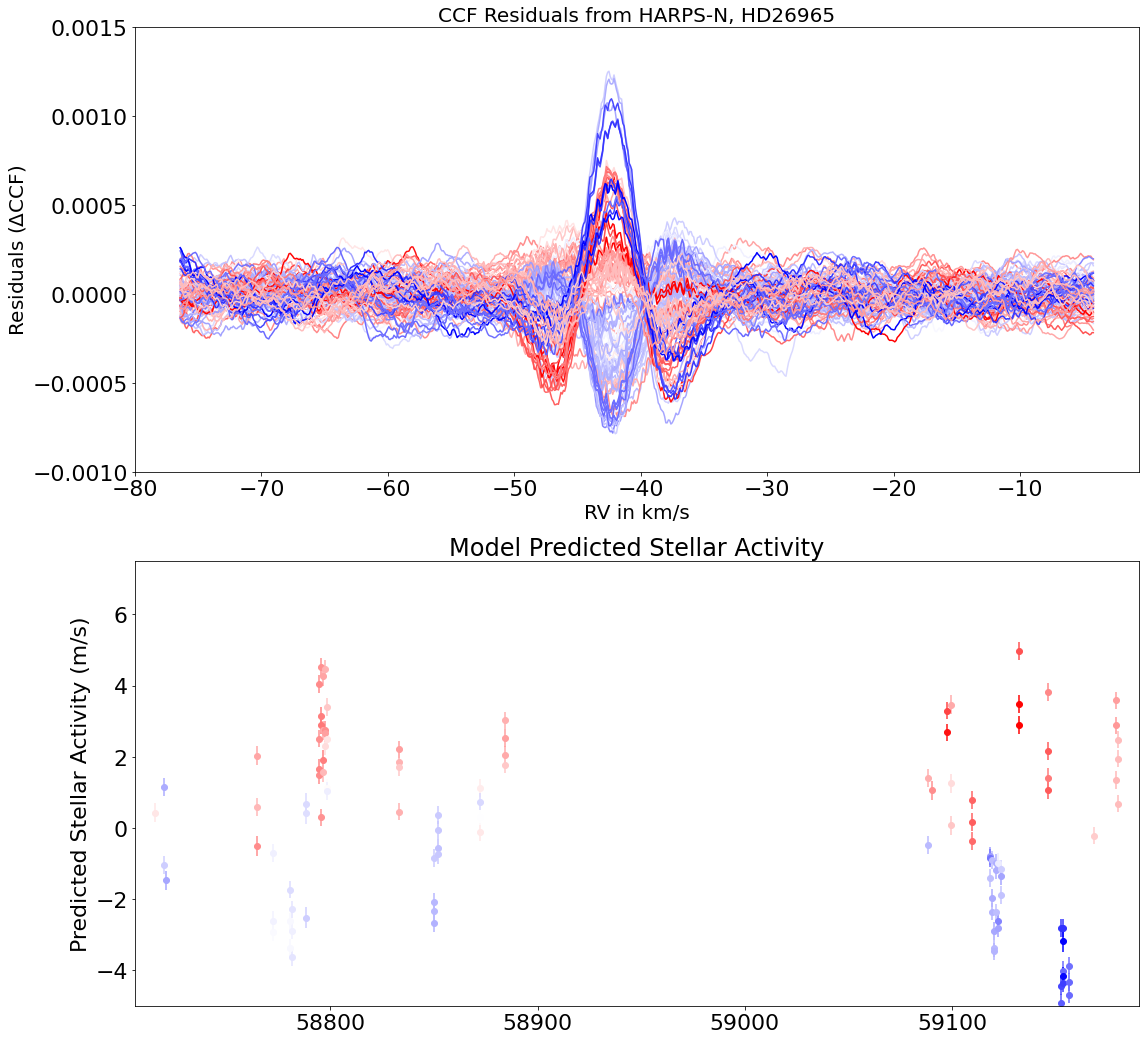

In [243]:
# animation code

# plot the CCFs and the corresponding predictions

fig, ax = plt.subplots(2, 1, figsize=(18, 18))


# plot ccf frame
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

col = plt.cm.jet([0.25,0.75])
n = len(open_ccf_norm_list)
colors = plt.cm.bwr(cscale_residuals)

ax[0].set_xlabel('RV in km/s', size=20)
ax[0].set_ylabel('Residuals ($\Delta$CCF)', size=20)
ax[0].set_title("CCF Residuals from HARPS-N, HD26965", size =20)

# plot rv frame
ax[1].set_ylabel('Predicted Stellar Activity (m/s)', size=22);
ax[1].set_ylim(-6.5, 6)
ax[1].set_title("Model Predicted Stellar Activity", size=24)
x_space = np.linspace(np.min(y_bjds), np.max(y_bjds), 1000)

for index_1 in [0,1]:
    ax[index_1].tick_params(axis='x', labelsize= 22) #to Set Matplotlib Tick Labels Font Size
    ax[index_1].tick_params(axis='y', labelsize= 22)

def plot_residuals(number):
        # Data for plotting
        rv_data = np.linspace(-20, 20, 161)

        #ax.plot(rv_data,CCF_data1_list[number]-CCF_data_zero,  color = colors[number])
        ax[0].plot(V_grid_x*1e-5, open_ccf_norm_list[number]-median_ccf, color = colors[number])
        #ax.set_xlabel('RV in km/s', size=20)
        #ax.set_ylabel('Residuals ($\Delta$CCF)', size=20)
        #ax.set_title("Old CCF Residuals from HARPS-N", size =20)

        # IMPORTANT ANIMATION CODE HERE
        # Used to keep the limits constant
        ax[0].set_ylim(-0.001, 0.0015)

        ax[1].errorbar(y_bjds[number], y_preds[number], yerr =y_erros[number], fmt = 'o', color = colors[number])
        ax[1].set_ylim(-5, 7.5)
        ax[1].set_xlim(np.min(y_bjds)-10, np.max(y_bjds)+10) 
        # Used to return the plot as an image rray
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        return image


a_range = np.arange(0, len(open_ccf_norm_list))
#a_range = np.delete(a_range, 10) #114
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./CCF_preds_hd26965.gif', [plot_residuals(i) for i in a_range], fps=10)


In [244]:
from pygifsicle import optimize
optimize("CCF_preds_hd26965.gif")

In [73]:
len(CCF_normalized_list[0])*len(CCF_normalized_list)

11753

In [12]:
# write to one text file


shifted_pd = pd.DataFrame(list(zip(bjd_list, 
                                   og_ccf_list, ref_shifted_CCF_data_list, mean_shifted_CCF_data_list,CCF_normalized_list,
                                   mu_og_list, mu_ref_list, mu_zero_list,
                                   s["vrad"]*1000, txt_file["svrad"], txt_file["fwhm"], txt_file["contrast"],
                                   txt_file["bis_span"], txt_file["noise"], txt_file["s_mw"])), 
               columns =['bjd', 
                         'og_ccf', 'ref_ccf', 'mean_ccf', 'norm_shifted_ccf',
                         'mu_og', 'mu_ref', 'mu_zero',
                         'vrad','svrad', 'fwhm', 'contrast', 
                         'bis_span','noise', 's_mw']) 

shifted_pd.to_csv('hd212657/shifted_fits_clean73_Jan7_one_file/shifted_ccfs.txt', index=False)

In [67]:
from astropy.table import Table
t = Table.from_pandas(shifted_pd)
t

#t.write('hd212657/test_table.fits', overwrite=True)
#new_table = Table.read('test_table.fits')

bjd,og_ccf,ref_ccf,mean_ccf,norm_shifted_ccf,mu_og,mu_ref,mu_zero,vrad,svrad,fwhm,contrast,bis_span,noise,s_mw
float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
57254.593124,[14983578. 14979255. 14975776. 14972936. 14970866. 14968651. 14966722. 14964372. 14962301. 14960665. 14959289. 14957439. 14955879. 14955232. 14954585. 14954306. 14954380. 14954418. 14953761. 14953958. 14954433. 14955458. 14956713. 14959663. 14964440. 14970297. 14975982. 14980066. 14982659. 14986169. 14991346. 14996545. 15001145. 15003810. 15005638. 15007144. 15007294. 15006355. 15004597. 15002871. 15000148. 14995359. 14985928. 14971488. 14954436. 14931991. 14903765. 14868740. 14828163. 14781726. 14729579. 14668122. 14596506. 14513723. 14417982. 14313220. 14200319. 14075137. 13938080. 13791040. 13629458. 13457857. 13275157. 13082188. 12881800. 12675411. 12462510. 12247156. 12030884. 11814134. 11602350. 11397908. 11204083. 11025233. 10862911. 10718511. 10595358. 10495550. 10421228. 10376074. 10358545. 10367765. 10404910. 10469754. 10558308. 10670918. 10805492. 10957959. 11129087. 11315431. 11514853. 11722044. 11933460. 12145508. 12355632. 12562028. 12763057. 12959317. 13147932. 13327821. 13499080. 13660063. 13810468. 13948996. 14078610. 14197331. 14305432. 14403155. 14490549. 14567848. 14636664. 14699000. 14753050. 14801498. 14844058. 14881071. 14911174. 14935676. 14955630. 14971313. 14983865. 14992963. 14999299. 15003436. 15006507. 15008522. 15007634. 15004990. 15000110. 14995549. 14990233. 14986369. 14982407. 14977123. 14970790. 14965167. 14961170. 14957214. 14954602. 14952215. 14949554. 14945663. 14942639. 14940655. 14941143. 14941002. 14940616. 14939672. 14938992. 14939816. 14940989. 14943157. 14945263. 14948315. 14952827. 14956258. 14959177. 14960778. 14962299. 14965659. 14968742.],[14983578. 14979255. 14975776. 14972936. 14970866. 14968651. 14966722. 14964372. 14962301. 14960665. 14959289. 14957439. 14955879. 14955232. 14954585. 14954306. 14954380. 14954418. 14953761. 14953958. 14954433. 14955458. 14956713. 14959663. 14964440. 14970297. 14975982. 14980066. 14982659. 14986169. 14991346. 14996545. 15001145. 15003810. 15005638. 15007144. 15007294. 15006355. 15004597. 15002871. 15000148. 14995359. 14985928. 14971488. 14954436. 14931991. 14903765. 14868740. 14828163. 14781726. 14729579. 14668122. 14596506. 14513723. 14417982. 14313220. 14200319. 14075137. 13938080. 13791040. 13629458. 13457857. 13275157. 13082188. 12881800. 12675411. 12462510. 12247156. 12030884. 11814134. 11602350. 11397908. 11204083. 11025233. 10862911. 10718511. 10595358. 10495550. 10421228. 10376074. 10358545. 10367765. 10404910. 10469754. 10558308. 10670918. 10805492. 10957959. 11129087. 11315431. 11514853. 11722044. 11933460. 12145508. 12355632. 12562028. 12763057. 12959317. 13147932. 13327821. 13499080. 13660063. 13810468. 13948996. 14078610. 14197331. 14305432. 14403155. 14490549. 14567848. 14636664. 14699000. 14753050. 14801498. 14844058. 14881071. 14911174. 14935676. 14955630. 14971313. 14983865. 14992963. 14999299. 15003436. 15006507. 15008522. 15007634. 15004990. 15000110. 14995549. 14990233. 14986369. 14982407. 14977123. 14970790. 14965167. 14961170. 14957214. 14954602. 14952215. 14949554. 14945663. 14942639. 14940655. 14941143. 14941002. 14940616. 14939672. 14938992. 14939816. 14940989. 14943157. 14945263. 14948315. 14952827. 14956258. 14959177. 14960778. 14962299. 14965659. 14968742.],[14983622.24371406 14979289.75398659 14975804.92330816 14972957.39306554 14970885.09513343 14968669.61191717 14966741.11689174 14964393.07495011 14962317.76697974 14960677.68070092 14959303.40829845 14957456.21822981 14955888.43693581 14955237.22089281 14954589.83726485 14954306.67910929 14954378.10287695 14954421.85785051 14953764.11300675 14953954.39698966 14954426.11008662 14955448.54382066 14956695.82542322 14959627.32349539 14964390.39274618 14970242.45332012 14975936.16434696 14980038.07937698 14982634.74167537 14986128.3634

In [62]:
shifted_pd['og_ccf']

0     [14983578.0, 14979255.0, 14975776.0, 14972936....
1     [11745628.0, 11744986.0, 11743543.0, 11741887....
2     [11370518.0, 11370015.0, 11368927.0, 11367284....
3     [9944056.0, 9940992.0, 9939069.0, 9937724.0, 9...
4     [21964384.0, 21957742.0, 21952028.0, 21947840....
                            ...                        
68    [21062130.0, 21056196.0, 21053632.0, 21052610....
69    [19997164.0, 19992346.0, 19987076.0, 19981274....
70    [27738070.0, 27732616.0, 27726738.0, 27719684....
71    [13362156.0, 13361725.0, 13360224.0, 13358341....
72    [13427893.0, 13423525.0, 13418655.0, 13413681....
Name: og_ccf, Length: 73, dtype: object

In [58]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.savez_compressed('hd212657/shifted_fits_clean73_Jan7_one_file/shifted_ccfs_np', bjd =shifted_pd['bjd'], 
         og_ccf = shifted_pd['og_ccf'], ref_ccf = shifted_pd['ref_ccf'], mean_ccf= shifted_pd['mean_ccf'],
         norm_shifted_ccf = shifted_pd['norm_shifted_ccf'], 
         mu_og = shifted_pd['mu_og'], mu_ref = shifted_pd['mu_ref'], mu_zero = shifted_pd['mu_zero'],
         vrad = shifted_pd['vrad'],svrad = shifted_pd['svrad'], fwhm = shifted_pd['fwhm'], 
         contrast = shifted_pd['contrast'],bis_span = shifted_pd['bis_span'],
         noise = shifted_pd['noise'], s_mw = shifted_pd['s_mw'])
testing123 = outfile.seek(0)
npzfile = np.load('hd212657/shifted_fits_clean73_Jan7_one_file/shifted_ccfs_np.npz')
npzfile.files

['bjd',
 'og_ccf',
 'ref_ccf',
 'mean_ccf',
 'norm_shifted_ccf',
 'mu_og',
 'mu_ref',
 'mu_zero',
 'vrad',
 'svrad',
 'fwhm',
 'contrast',
 'bis_span',
 'noise',
 's_mw']

In [61]:
npzfile['og_ccf']

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [694]:
pd_written_file = pd.read_csv("hd212657/shifted_fits_clean73_Jan7_one_file/shifted_ccfs.txt")
pd_written_file

,bjd,og_ccf,ref_ccf,mean_ccf,norm_shifted_ccf,mu_og,mu_ref,mu_zero,vrad,svrad,fwhm,contrast,bis_span,noise,s_mw
0,57254.593124,[14983578. 14979255. 14975776. 14972936. 14970...,[14983578. 14979255. 14975776. 14972936. 14970...,[14983622.24371406 14979289.75398659 14975804....,[1.00090116 1.00061175 1.00037896 1.00018875 1...,-17.424084,-17.424084,-17.421820,-17424.22,1.03,7615.54,30.860,59.04,0.96,0.00
1,57257.578995,[11745628. 11744986. 11743543. 11741887. 1...,[11745628. 11744986. 11743543. 11741887. 1...,[11745627.85974124 11744988.36596237 11743546....,[1.00053891 1.00048444 1.00036158 1.00022058 1...,-17.421527,-17.421527,-17.421033,-17422.45,1.15,7613.57,30.786,62.07,1.09,0.00
2,57267.619795,[11370518. 11370015. 11368927. 11367284. 1...,[11370518. 11370015. 11368927. 11367284. 1...,[11370518.11327485 11370020.23439642 11368934....,[1.00086839 1.00082457 1.00072896 1.00058503 1...,-17.423703,-17.423703,-17.422229,-17423.43,1.17,7621.53,30.692,60.57,1.12,0.00
3,57269.560355,[9944056. 9940992. 9939069. 9937724. 99383...,[9944056. 9940992. 9939069. 9937724. 99383...,[9944118.22875929 9941025.7227411 9939096.715...,[1.0007673 1.00045607 1.00026193 1.00012405 1...,-17.426463,-17.426463,-17.422719,-17425.70,1.25,7619.69,30.672,58.82,1.20,0.00
4,57270.543983,[21964384. 21957742. 21952028. 21947840. 21941...,[21964384. 21957742. 21952028. 21947840. 21941...,[21964500.84642557 21957860.12716667 21952111....,[1.00107874 1.00077608 1.00051408 1.00032334 1...,-17.425920,-17.425920,-17.421386,-17426.49,0.87,7618.71,30.670,63.70,0.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,57671.506236,[21062130. 21056196. 21053632. 21052610. 21048...,[21065595.55116675 21058128.06389268 21054295....,[21065634.8492498 21058152.2727259 21054303....,[1.00088518 1.00052966 1.00034682 1.00029386 1...,-17.423547,-17.423547,-17.422482,-17415.20,1.39,7608.98,31.240,59.02,1.34,0.15
69,57672.422952,[19997164. 19992346. 19987076. 19981274. 19976...,[19999139.54499069 19994283.67678265 19989288....,[19999061.91459572 19994213.75953605 19989206....,[1.00108505 1.00084237 1.00059171 1.00030315 1...,-17.417474,-17.417472,-17.421188,-17421.06,1.05,7606.50,31.105,58.11,0.99,0.15
70,57672.508652,[27738070. 27732616. 27726738. 27719684. 27713...,[27740457.7395851 27734767.22278368 27729232....,[27740321.01402296 27734652.10782212 27729102....,[1.00092739 1.00072284 1.00052259 1.00028074 1...,-17.416156,-17.416156,-17.421561,-17420.37,0.92,7602.12,31.088,57.96,0.86,0.15
71,57673.416804,[13362156. 13361725. 13360224. 13358341. 13355...,[13361788.41986177 13362085.89332677 13360884....,[13361806.20136549 13362077.65036357 13360866....,[1.00052056 1.00054089 1.00045016 1.00032154 1...,-17.418481,-17.418481,-17.421487,-17423.02,0.88,7610.45,30.985,57.82,0.81,0.15


In [632]:
np.mean(s_pd_clean["vrad"])*0.001

-17.42195589041096

In [634]:
rv*0.001

-17.41786

In [629]:
shift_to_mean

-0.004095890410957509

In [588]:
s_pd_clean["wls"][0][0] - s_pd_clean["wls"][i][0]

-0.09999847412109375

og mu: -17.417648799808433
ref mu: -17.417647664532964
shift to mean: -0.004095890410957509
zero mu: -17.42174358613404


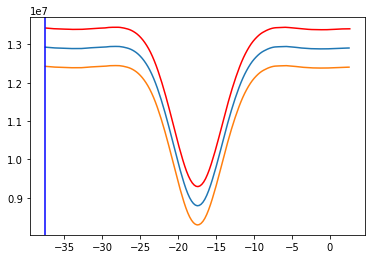

In [645]:
    parinfo = [{'fixed': False, 'step': 1e-4*np.max(ccf_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(ccf_data)}]
    
    # original (og) fit before any shifting
    x_axis = s_pd_clean["wls"][i]
    amp_og_guess = np.max(ccf_data)-np.min(ccf_data)
    offset_og_guess = np.max(ccf_data)
    index_og = np.argmin(ccf_data)
    sigma_og = fwhm_sigma(ccf_data, x_axis)[1]
    sigma_og_list.append(sigma_og)
    
    # flip over ccf, find max, find half max locations, distance between those two locations, divide
    p_og_guess = [amp_og_guess, x_axis[index_og], sigma_og, offset_og_guess]
    pfit_og, p_results_og = mpyfit.fit(least, p_og_guess, (x_axis, ccf_data), parinfo)
    mu_og = pfit_og[1]
    print("og mu: "+str(mu_og))
    mu_og_list.append(mu_og)
    
    # shift to the same reference frame
    x_diff =s_pd_clean["wls"][0][0]-s_pd_clean["wls"][i][0]
    x_diff_list.append(x_diff)
    x_axis_ref_shift = x_axis + x_diff
    x_axis_ref_shift_list.append(x_axis_ref_shift)
    f_ref = interp1d(x_axis, ccf_data, kind='cubic', fill_value='extrapolate') 
    ref_shifted_CCF_data = f_ref(x_axis_ref_shift)
    ref_shifted_CCF_data_list.append(ref_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_ref = np.argmin(ref_shifted_CCF_data)
    sigma_ref = fwhm_sigma(ccf_data, s_pd_clean["wls"][0])[1]
    
    # fit the reference frame shifted rvs
    p_ref_guess = [amp_og_guess, x_axis_ref_shift[index_ref], sigma_ref, offset_og_guess]
    pfit_ref, p_results_ref = mpyfit.fit(least, p_ref_guess, (x_axis_ref_shift, ref_shifted_CCF_data), parinfo)
    mu_ref = pfit_ref[1]
    print("ref mu: "+str(mu_ref))
    mu_ref_list.append(mu_ref)
    
    # shift to mean
    shift_to_mean = (np.mean(s_pd_clean["vrad"]) - rv )*0.001
    print("shift to mean: " +str(shift_to_mean))
    x_axis_mean_shift = x_axis_ref_shift + shift_to_mean
    x_axis_mean_shift_list.append(x_axis_mean_shift)
    f_mean = interp1d(x_axis_mean_shift, ref_shifted_CCF_data, kind='cubic', fill_value='extrapolate')
    mean_shifted_CCF_data = f_mean(x_axis_ref_shift)
    mean_shifted_CCF_data_list.append(mean_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_mean = np.argmin(mean_shifted_CCF_data)
    
    # fit the zero shifted rvs
    p_zero_guess = [amp_og_guess, x_axis_ref_shift[index_mean], sigma_ref, offset_og_guess]
    pfit_zero, p_results_zero = mpyfit.fit(least, p_zero_guess, (x_axis_ref_shift, mean_shifted_CCF_data), parinfo)
    mu_zero = pfit_zero[1]
    print("zero mu: "+str(mu_zero))
    mu_zero_list.append(mu_zero)
    
    
    plt.plot(x_axis, ccf_data, label="og", color="r")
    plt.plot(x_axis_ref_shift, ref_shifted_CCF_data-0.5e6, label="ref")
    plt.plot(x_axis_ref_shift, mean_shifted_CCF_data-1e6, label="ref")
    #plt.xlim(np.min(x_axis)-0.3, -37.1)
    plt.axvline(-37.5, label="half max 1", color="b")
    #plt.ylim(np.min(x_axis), -35)

Text(0.5, 0, 'BJD')

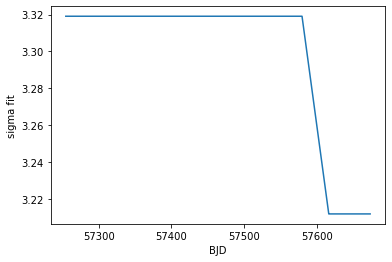

In [508]:
plt.plot(s_pd_clean["bjd"], sigma_og_list)
plt.ylabel("sigma fit")
plt.xlabel("BJD")

og mu: -17.4220386743236
ref mu: -16.922037371779613
median mu: -16.42204522668653


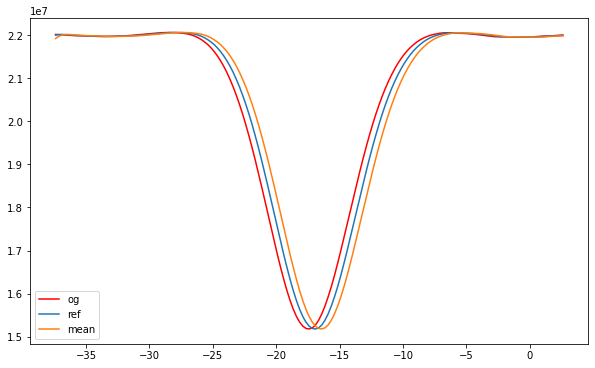

In [579]:
    parinfo = [{'fixed': False, 'step': 1e-4*np.max(ccf_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(ccf_data)}]
    
    # original (og) fit before any shifting
    x_axis = s_pd_clean["wls"][i]
    amp_og_guess = np.max(ccf_data)-np.min(ccf_data)
    offset_og_guess = np.max(ccf_data)
    index_og = np.argmin(ccf_data)
    sigma_og = fwhm_sigma(ccf_data, x_axis)[1]
    sigma_og_list.append(sigma_og)
    
    # flip over ccf, find max, find half max locations, distance between those two locations, divide
    p_og_guess = [amp_og_guess, x_axis[index_og], sigma_og, offset_og_guess]
    pfit_og, p_results_og = mpyfit.fit(least, p_og_guess, (x_axis, ccf_data), parinfo)
    mu_og = pfit_og[1]
    print("og mu: "+str(mu_og))
    mu_og_list.append(mu_og)
    
    # shift to the same reference frame
    x_diff =0.5
    x_axis_ref_shift = x_axis + x_diff
    x_axis_ref_shift_list.append(x_axis_ref_shift)
    f_ref = interp1d(x_axis_ref_shift, ccf_data, kind='cubic', fill_value='extrapolate')
    ref_shifted_CCF_data = f_ref(x_axis)
    ref_shifted_CCF_data_list.append(ref_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_ref = np.argmin(ref_shifted_CCF_data)
    sigma_ref = fwhm_sigma(ccf_data, s_pd_clean["wls"][0])[1]
    
    # fit the reference frame shifted rvs
    p_ref_guess = [amp_og_guess, x_axis_ref_shift[index_ref], sigma_ref, offset_og_guess]
    pfit_ref, p_results_ref = mpyfit.fit(least, p_ref_guess, (x_axis, ref_shifted_CCF_data), parinfo)
    mu_ref = pfit_ref[1]
    print("ref mu: "+str(mu_ref))
    mu_ref_list.append(mu_ref)
    
    # shift to mean
    shift_to_mean = 0.5#(np.mean(s_pd_clean["vrad"]) - rv )*0.001
    x_axis_mean_shift = x_axis_ref_shift + shift_to_mean
    x_axis_mean_shift_list.append(x_axis_mean_shift)
    f_mean = interp1d(x_axis_mean_shift, ref_shifted_CCF_data, kind='cubic', fill_value='extrapolate')
    mean_shifted_CCF_data = f_mean(x_axis_ref_shift)
    mean_shifted_CCF_data_list.append(mean_shifted_CCF_data)
    
    # calculate index of max for initial guess for mu 
    index_mean = np.argmin(mean_shifted_CCF_data)
    
    # fit the zero shifted rvs
    p_zero_guess = [amp_og_guess, x_axis_mean_shift[index_mean], sigma_ref, offset_og_guess]
    pfit_zero, p_results_zero = mpyfit.fit(least, p_zero_guess, (x_axis, mean_shifted_CCF_data), parinfo)
    mu_zero = pfit_zero[1]
    print("median mu: "+str(mu_zero))
    mu_zero_list.append(mu_zero)
    
    
    fig, ax = plt.subplots(1,1, figsize=(10, 6))

    plt.plot(x_axis, ccf_data, label="og", color="r")
    plt.plot(x_axis, ref_shifted_CCF_data, label="ref")
    #plt.plot(x_axis_ref_shift, ref_shifted_CCF_data, label="ref")
    plt.plot(x_axis, mean_shifted_CCF_data, label="mean")
    plt.legend()

In [166]:
np.mean(s_pd_clean["vrad"])-rv

-4.095890410957509

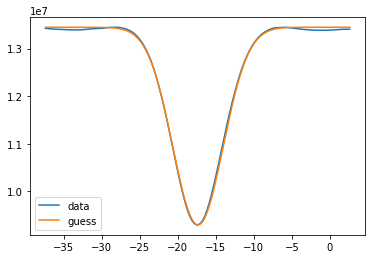

In [167]:
plt.plot(x_axis, ccf_data, label="data")
#plt.plot(x_axis, zero_shifted_CCF_data, label="zero_shift")
plt.plot(x_axis, gauss(x_axis, [amp_og_guess, -17.35, 3.3, offset_og_guess]), label="guess")
plt.legend()

In [168]:
np.mean(s_pd_clean["vrad"]*0.001)

-17.42195589041096

In [245]:
#plt.plot(s_pd_clean["vrad"]*0.001, label = "rvs")
plt.plot(s_pd_clean["bjd"], mu_og_list, ".", label = "og fit", color= 'r')
plt.plot(s_pd_clean["bjd"], mu_ref_list,".", label = "ref shift fit", color="b")
plt.plot(s_pd_clean["bjd"], mu_zero_list, ".",label = "median shift fit", color="orange")
plt.hlines(y=np.mean(s_pd_clean["vrad"]*0.001), xmin= np.min(s_pd_clean["bjd"]), xmax=np.max(s_pd_clean["bjd"]), label="median", color="orange")
#plt.xlim(0, 38)
#plt.ylim(-18, -17)
plt.legend()


NameError: name 's_pd_clean' is not defined

In [109]:
mu_zero_list

[-1.9973027703578794,
 -2.691318111914816,
 -2.08997443272414,
 0.8596444035470328,
 -1.7113198978467006,
 5.749987637215351,
 1.4450753864884964,
 215.67776085010857,
 -3.0964779806756626,
 136.68964229910074,
 -4.999601281842505,
 2.4982310276965816,
 -4.260908648971264,
 -5.401078479117407,
 -3.069603329394658,
 -3.49717115445915,
 1.7919453695895209,
 29.99639898000477,
 1.7551961212946399,
 -4.748831177568275,
 -1.1704986067594123,
 -3.2719870484474294,
 -1.6266378989723618,
 -3.017535622709459,
 -2.6483137828880077,
 -0.14064460148852218,
 -1.3653058118746935,
 -2.128318724110954,
 1.816164570129345,
 -1.0476378592903746,
 -5.003960695990021,
 -4.38061744554706,
 -3.3945110233182025,
 -1.65113648905103,
 -2.35119550788295,
 -3.0691013117348804,
 -5.062708294550529,
 -1.1905989843878266,
 -1.5216249899256613,
 -19.861872885377995,
 -5.584366687732861,
 -3.4522648291246827,
 -4.089222228657457,
 -4.7881448846575845,
 -4.021613687252378,
 -2.9022838884793662,
 -2.351163795261693,
 -